
# Multi-label Classification with the PriceRunner Dataset

## Task Overview
In this exercise, you will develop a multi-label classification model to classify products into multiple categories based on their 'Product Title' and 'Cluster Label'. The target variable for classification will be 'Category Label'.

Your task includes selecting the right features, preprocessing the data, implementing a multi-label classification model, and evaluating its performance.

Complete the sections marked `# TODO` and run each cell to see the output of your code.


## Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Step 1: Data Loading
Load the dataset into a Pandas DataFrame.


In [2]:
dataset = pd.read_csv('Dataset\pricerunner_aggregate.csv')
dataset.head()

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones



## Step 2: Data Preprocessing
Preprocess the 'Product Title' and 'Cluster Label' features and encode the 'Category Label'.


In [3]:
columns = dataset.columns

# Remove spaces from column names
columns_stripped = [column.strip() for column in columns]

# Update the column names in the dataset
dataset.columns = columns_stripped

In [4]:
categories = set(dataset['Category Label'])
print("Number of Categories:", len(categories))
print(categories)

Number of Categories: 10
{'Dishwashers', 'Freezers', 'Microwaves', 'CPUs', 'TVs', 'Fridge Freezers', 'Washing Machines', 'Mobile Phones', 'Fridges', 'Digital Cameras'}


In [5]:
# Preprocess 'Product Title'
dataset['Product Title'] = dataset['Product Title'].str.strip()
dataset['Product Title'] = dataset['Product Title'].str.lower()

# Preprocess 'Cluster Label'
dataset['Cluster Label'] = dataset['Cluster Label'].str.strip()
dataset['Cluster Label'] = dataset['Cluster Label'].str.lower()

# Encode 'Category Label'
category_mapping = {
    'Microwaves': 0,
    'Digital Cameras': 1,
    'Dishwashers': 2,
    'Freezers': 3,
    'Fridge Freezers': 4,
    'TVs': 5,
    'Washing Machines': 6,
    'Mobile Phones': 7,
    'Fridges': 8,
    'CPUs': 9
}
dataset['Category Label'] = dataset['Category Label'].map(category_mapping)

In [6]:
dataset.head()

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,apple iphone 8 plus 64gb silver,1,1,apple iphone 8 plus 64gb,2612,7
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,apple iphone 8 plus 64gb,2612,7
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,apple iphone 8 plus 64gb,2612,7
3,4,apple iphone 8 plus 64gb space grey,4,1,apple iphone 8 plus 64gb,2612,7
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,apple iphone 8 plus 64gb,2612,7


### Extract Required Fields

In [7]:
X = dataset[['Product Title', 'Cluster Label']]
y = dataset['Category Label']

### Train Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Vectorize the text data using CountVectorizer

In [9]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train['Product Title'] + ' ' + X_train['Cluster Label'])
X_test_vectorized = vectorizer.transform(X_test['Product Title'] + ' ' + X_test['Cluster Label'])


## Step 3: Model Training
Implement and train a multi-label classification model.


In [10]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

Prediction

In [11]:
y_pred = nb_classifier.predict(X_test_vectorized)


## Step 4: Model Evaluation
Evaluate the model using appropriate multi-label classification metrics.


In [12]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       469
           1       1.00      0.99      1.00       542
           2       0.95      0.97      0.96       662
           3       0.98      0.85      0.91       439
           4       0.91      0.96      0.93      1115
           5       0.99      1.00      1.00       723
           6       0.99      0.97      0.98       796
           7       1.00      1.00      1.00       818
           8       0.93      0.92      0.92       728
           9       1.00      1.00      1.00       771

    accuracy                           0.97      7063
   macro avg       0.97      0.97      0.97      7063
weighted avg       0.97      0.97      0.97      7063



Confusion Matrix

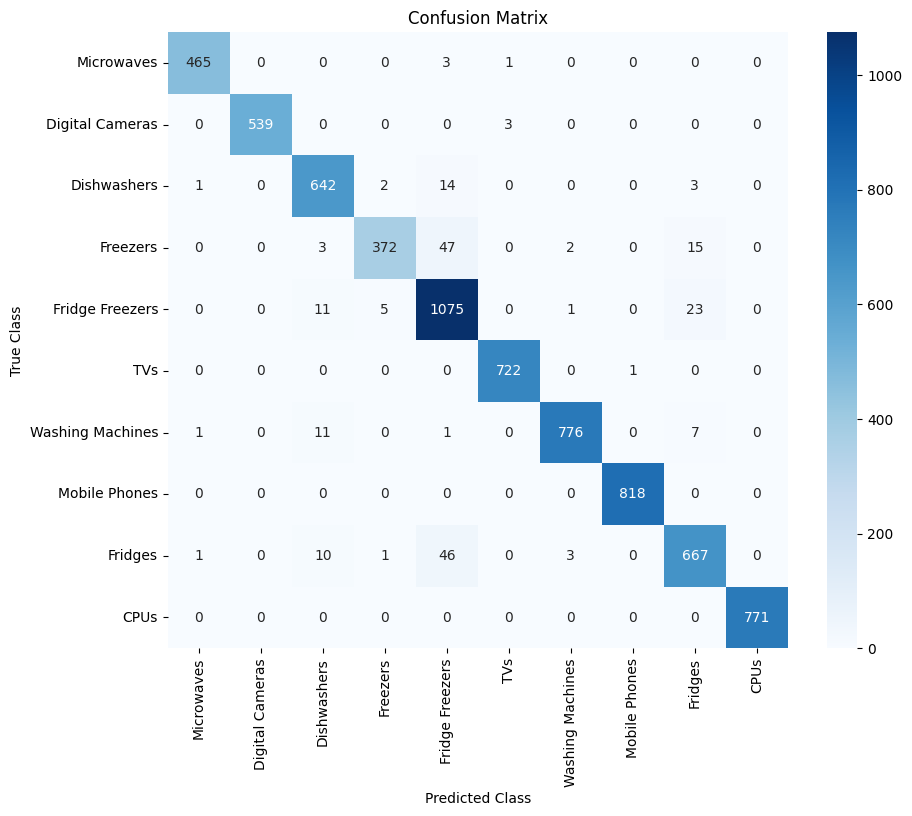

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=category_mapping.keys(), yticklabels=category_mapping.keys())
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

### Save Results in .CSV File

In [14]:
# Save Category IDs
predictions_df = pd.DataFrame({'Category Label': y_pred})
predictions_df.to_csv('Q2.csv', index=False)

# Save Category Names
# reverse_category_mapping = {v: k for k, v in category_mapping.items()}
# predictions_df['Category Label'] = predictions_df['Category Label'].map(reverse_category_mapping)
# predictions_df.to_csv('Q2_names.csv', index=False)


## Step 5: Conclusion and Discussion
Reflect on the model's performance and discuss potential improvements.


As we can see, Generative Bayes Classifier performed quiet well for our data set. The model achieved a 97% accuracy. Using a generative Bayes classifier, such as the Multinomial Naive Bayes classifier, can be a good choice for the given dataset for the following reasons:

### 1. Text Classification
The dataset involves classifying products based on their 'Product Title' and 'Cluster Label'. Generative Bayes classifiers are commonly used in text classification tasks, where the features are typically discrete or count-based, such as word frequencies or presence/absence of specific words. In this case, the classifier can learn the probabilistic relationship between the words in the titles and the corresponding categories.

### 2. Efficiency
Generative Bayes classifiers are computationally efficient and have relatively low training and prediction times compared to more complex models. This makes them suitable for large datasets with high-dimensional feature spaces.

### 3. Independence Assumption
Naive Bayes classifiers assume independence between features given the class label. Although this assumption may not hold in all cases, it can still work reasonably well in practice for text classification tasks. In this dataset, while there may be some dependencies between words in the product titles, Naive Bayes can capture the overall probabilistic patterns and provide effective classification.

### 4. Interpretability
Naive Bayes classifiers provide interpretability, as they allow you to examine the conditional probabilities of each feature given the class label. This can be useful in understanding the important features or words that contribute to the classification decisions.